# Fraud Detection - Using ML to analyse the credit transactions, and predictiong if a new sample is fraud or not.

>[Fraud Detection - Using ML to analyse the credit transactions, and predictiong if a new sample is fraud or not.](#scrollTo=A2JWwVbBP5QH)

>>[Introduction](#scrollTo=pDJBD8dWRa6y)

>>[Research subject](#scrollTo=_MkFs7J0TkGw)

>>[Data description](#scrollTo=SQkUklElVklY)

>>[Data loading and preliminary preparation](#scrollTo=wgvy1FPbYF5W)

>>[Data Research](#scrollTo=yazS2f-xf7yH)

>>[Grpahs](#scrollTo=v_DaWVzfNPe4)

>>[Data Preprocessing](#scrollTo=XsbnjLC1Ngfd)

>>>[Column subsets](#scrollTo=BwJ9X8bnEujy)

>>>[Feature engineering (fe)](#scrollTo=FKCAyx78xDgr)

>>>>[Dates to floats (number of seconds since Unix Epoch)](#scrollTo=N95tlnnSxFYH)

>>>>[generate_col_reducing_function_transformer](#scrollTo=2VzRza4uQsZQ)

>>>>[Concatenate first and last names](#scrollTo=S32-8UkMxko6)

>>>>[Concatenate addresses](#scrollTo=rqemzWsAyhwY)

>>>>[Calculate age from dob (date of birth)](#scrollTo=HO1Q_nH3zCif)

>>>>[Feature engineering transformer](#scrollTo=S-kibeQi0hou)

>>>[Imputation](#scrollTo=h8_QRs-510rd)

>>>[Nominal to numeric](#scrollTo=RlcBqKsA2FxQ)

>>>[Outliers](#scrollTo=JrcYxMvg2LpP)

>>>[Scaler](#scrollTo=CPSdHWrb2Oq2)

>>>[Preprocessing pipeline](#scrollTo=jcyZLfyP2QUr)

>>>[Data balancing](#scrollTo=enfFsk-Ntd-U)

>>[Machine Learning](#scrollTo=n1DGWvbf2TXn)

>>>[Classifier pipeline](#scrollTo=aDTyHPKc2WIL)

>>>[Grid search](#scrollTo=cibc0JKL2YtJ)

>>[Performence research](#scrollTo=GGwaQFe_4dp7)



## Introduction

<div dir="rtl">
    <img src="../../shared/pics/school_logo.jpeg" />
</div>

**School name: Ironi D.**

**Student name: Yorai Yaniv.**


**Research title: Fraud Detection.**


**School year: 2024.**


**Teacher's name: Itai Barly.**


## Research subject

<img src="pics/illustration.png" />



Description: The research is tageted to detect if a card transaction is a fraud or not.

## Data description

Dataset description: The dataset is a collection of card transactions, some are fraud and most are not.

Origin: Kaggle.

Autor: KELVIN KELUE.

Latest update: March 9th, 2024.


Url: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction?resource=download

**Shape of dataset: 555,719 Rows on 22 Columns.**

Trans_date_trans_time: Timestamp of the transaction (date and time).

Cc_num:Unique customer identification number.

MerchantThe merchant involved in the transaction.

Category Transaction type (e.g., personal, childcare).

Amt:Transaction amount.

First: Cardholder's first name.

Last Cardholder's last name.

Gender: Cardholder's gender.

Street: Cardholder's street address.

City: Cardholder's city of residence.

State: Cardholder's state of residence.

Zip: Cardholder's zip code.

Lat:Latitude of cardholder's location.

Long: Longitude of cardholder's location.

City_pop:Population of the cardholder's city.

Job:Cardholder's job title.

Dob: Cardholder's date of birth.

Trans_num: Unique transaction identifier.

Unix_time: Transaction timestamp (Unix format).

Merch_lat:Merchant's location (latitude).

Merch_long: Merchant's location (longitude).

Is_fraud:Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

## Data loading and preliminary preparation

In [1]:
import warnings
warnings.simplefilter(action= 'ignore', category= FutureWarning)

In [2]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as lrn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from typing import Callable
from sklearn.preprocessing import FunctionTransformer, \
                                  OrdinalEncoder, OneHotEncoder, \
                                  TargetEncoder, \
                                  MinMaxScaler, MaxAbsScaler, StandardScaler
from feature_engine.outliers import Winsorizer # A class that replaces outliers

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, \
                            make_scorer, accuracy_score, f1_score, recall_score

from imblearn.over_sampling import RandomOverSampler

from os import path

In [3]:
import sys
sys.path.append('../../')

from shared.code import helpers

In [4]:
seed = 42

In [5]:
# Load the csv into a pandas DataFrame
# "data/dynamic/fraud test.csv"
orig = pd.read_csv('data/static/dataset.lfs.csv')
orig

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
orig.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
target = 'is_fraud'

In [8]:
orig[target].value_counts()/orig.shape[0]

is_fraud
0    0.99614
1    0.00386
Name: count, dtype: float64

In [9]:
fraud_records = orig[orig[target] == 1]
fraud_records

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,22/12/2020 22:05,2.242180e+15,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,22/12/2020 22:18,2.242180e+15,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,22/12/2020 22:31,2.242180e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,22/12/2020 23:06,2.242180e+15,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,03/03/1959,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1


In [10]:
non_frauds = orig[orig[target] == 0]
non_frauds

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
orig_reduced = non_frauds.sample(n= 10000-(fraud_records.shape[0]), random_state= seed)

In [12]:
orig_reduced[target].value_counts()/orig_reduced.shape[0]

is_fraud
0    1.0
Name: count, dtype: float64

In [13]:
X, y = orig_reduced.drop(target, axis= 1), orig_reduced[target].copy()

In [14]:
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
547885,547885,29/12/2020 19:17,3.712260e+14,"fraud_Medhurst, Cartwright and Ebert",personal_care,60.51,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,...,62262,38.9311,-89.2463,1810,Race relations officer,24/12/1974,048c8b965dfcbdd9b023f6a5160beb0d,1388344623,39.205918,-88.295627
528140,528140,26/12/2020 03:46,6.596740e+15,fraud_Pouros-Haag,shopping_pos,2.36,Spencer,Williams,M,1145 Tony Drive Suite 080,...,55388,44.9595,-93.8482,5619,Licensed conveyancer,15/01/1959,828b54bd4d205f1114bce6fa8bc8f433,1388029564,44.826412,-93.239743
129300,129300,04/08/2020 22:27,3.055160e+13,"fraud_Mante, Luettgen and Hackett",health_fitness,5.55,Morgan,Smith,F,1441 Bradley Place,...,28073,35.1836,-81.4552,5621,Toxicologist,14/11/1973,383ac06cc8c02ef1e2c2bee329a30f77,1375655246,34.787130,-81.789226
354681,354681,05/11/2020 11:29,6.011390e+15,"fraud_Goldner, Kovacek and Abbott",grocery_pos,115.80,Jacqueline,Marsh,F,950 Sheryl Spurs,...,15432,40.1151,-79.8627,427,Mining engineer,05/02/1951,506ea157ec09c9f04eb3ea8bed59d33a,1383650992,39.342100,-80.375392
182576,182576,24/08/2020 12:08,6.011350e+15,"fraud_Turner, Ziemann and Lehner",food_dining,8.30,Samuel,Johnston,M,16285 Jessica Lights,...,35229,33.4629,-86.7904,493806,Musician,12/07/1980,5646a4a1c03bf24f0dcc364e0116f7cd,1377346098,33.627330,-87.257660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416999,416999,01/12/2020 04:03,1.800810e+14,fraud_Pouros-Conroy,shopping_pos,2.26,Connie,Carroll,F,872 Justin Views Suite 746,...,38740,34.0470,-90.7652,466,Trading standards officer,03/04/1955,0ce3d7e9b0c2d2456b2909ca99359c44,1385870585,34.073703,-90.138546
151032,151032,12/08/2020 20:32,3.531130e+15,"fraud_Haley, Jewess and Bechtelar",shopping_pos,2.24,Shelby,Mitchell,F,974 Cindy Stream,...,5733,43.8065,-73.0882,5895,"Scientist, marine",13/07/1975,7c77691f2c2b0c317b26ccee63d6187c,1376339570,43.659367,-73.308211
242352,242352,17/09/2020 00:02,3.577790e+15,fraud_Kiehn Inc,grocery_pos,124.49,Mary,Humphrey,F,9853 Flynn Hollow Apt. 602,...,58275,47.7068,-97.2092,733,Visual merchandiser,12/11/1994,c1f50dff7d051c8ea87173b5beadfe2a,1379376160,48.038492,-96.343289
340116,340116,30/10/2020 05:34,4.961000e+15,fraud_Kerluke Inc,misc_net,3.71,Stacy,Walsh,F,324 Donna Ridge Suite 651,...,17929,40.6284,-76.1950,1606,Ecologist,10/05/1966,3fc4ce46db2702b9e80da18b5f921316,1383111252,39.924086,-76.166591


In [15]:
X = pd.concat([X, fraud_records.drop(target, axis=1)], axis= 0)

In [16]:
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
547885,547885,29/12/2020 19:17,3.712260e+14,"fraud_Medhurst, Cartwright and Ebert",personal_care,60.51,Stacy,Lambert,F,85430 Julie Trafficway Suite 792,...,62262,38.9311,-89.2463,1810,Race relations officer,24/12/1974,048c8b965dfcbdd9b023f6a5160beb0d,1388344623,39.205918,-88.295627
528140,528140,26/12/2020 03:46,6.596740e+15,fraud_Pouros-Haag,shopping_pos,2.36,Spencer,Williams,M,1145 Tony Drive Suite 080,...,55388,44.9595,-93.8482,5619,Licensed conveyancer,15/01/1959,828b54bd4d205f1114bce6fa8bc8f433,1388029564,44.826412,-93.239743
129300,129300,04/08/2020 22:27,3.055160e+13,"fraud_Mante, Luettgen and Hackett",health_fitness,5.55,Morgan,Smith,F,1441 Bradley Place,...,28073,35.1836,-81.4552,5621,Toxicologist,14/11/1973,383ac06cc8c02ef1e2c2bee329a30f77,1375655246,34.787130,-81.789226
354681,354681,05/11/2020 11:29,6.011390e+15,"fraud_Goldner, Kovacek and Abbott",grocery_pos,115.80,Jacqueline,Marsh,F,950 Sheryl Spurs,...,15432,40.1151,-79.8627,427,Mining engineer,05/02/1951,506ea157ec09c9f04eb3ea8bed59d33a,1383650992,39.342100,-80.375392
182576,182576,24/08/2020 12:08,6.011350e+15,"fraud_Turner, Ziemann and Lehner",food_dining,8.30,Samuel,Johnston,M,16285 Jessica Lights,...,35229,33.4629,-86.7904,493806,Musician,12/07/1980,5646a4a1c03bf24f0dcc364e0116f7cd,1377346098,33.627330,-87.257660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,517197,22/12/2020 22:05,2.242180e+15,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,38668,34.6323,-89.8855,14462,Database administrator,03/03/1959,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011
517274,517274,22/12/2020 22:18,2.242180e+15,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,38668,34.6323,-89.8855,14462,Database administrator,03/03/1959,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612
517341,517341,22/12/2020 22:31,2.242180e+15,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,38668,34.6323,-89.8855,14462,Database administrator,03/03/1959,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780
517529,517529,22/12/2020 23:06,2.242180e+15,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,38668,34.6323,-89.8855,14462,Database administrator,03/03/1959,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093


In [17]:
y = pd.concat([y, fraud_records[target]], axis= 0)

In [18]:
y

547885    0
528140    0
129300    0
354681    0
182576    0
         ..
517197    1
517274    1
517341    1
517529    1
517571    1
Name: is_fraud, Length: 10000, dtype: int64

In [19]:
X.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
dtype: object

In [20]:
y.dtype

dtype('int64')

In [21]:
y.isna().sum()

np.int64(0)

In [22]:
# Check for empty rows
X.isna().all(axis= 1).sum()

np.int64(0)

No empty rows.

In [23]:
X.duplicated().sum()

np.int64(0)

There are no duplicatons in the dataset.

In [24]:
X_cols = X.columns.to_list()
X_cols

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [25]:
X_vc = X.nunique() / X.shape[0]
X_vc

Unnamed: 0               1.0000
trans_date_trans_time    0.9752
cc_num                   0.0890
merchant                 0.0693
category                 0.0014
amt                      0.7396
first                    0.0341
last                     0.0465
gender                   0.0002
street                   0.0910
city                     0.0838
state                    0.0050
zip                      0.0898
lat                      0.0896
long                     0.0896
city_pop                 0.0826
job                      0.0474
dob                      0.0898
trans_num                1.0000
unix_time                1.0000
merch_lat                0.9998
merch_long               0.9998
dtype: float64

In [26]:
empty_cutoff = 0.5
saturated_cutoff = 0.97

In [27]:
empty_cols = X_vc[X_vc <= empty_cutoff].index.to_list()
empty_cols

['cc_num',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob']

In [28]:
saturated_cols = X_vc[X_vc >= saturated_cutoff].index.to_list()
saturated_cols

['Unnamed: 0',
 'trans_date_trans_time',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [29]:
set(X_cols) - set(empty_cols) - set(saturated_cols)

{'amt'}

Normally we would delete the "empty" columns,
but if we did this we would be left with a single column.

In [30]:
# We may be able to extract useful information
# from the follwing saturated columns.
saturated_cols_to_preserve = ['trans_date_trans_time',
                              'amt',
                              'merch_lat',
                              'merch_long']
saturated_cols_to_drop = list(set(saturated_cols) - set(saturated_cols_to_preserve))
saturated_cols_to_drop

['Unnamed: 0', 'trans_num', 'unix_time']

In [31]:
X_reduced = X.drop(saturated_cols_to_drop, axis= 1)

In [32]:
X_reduced.shape

(10000, 19)

In [33]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)

## Data Research

In [34]:
X_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long
192425,27/08/2020 21:54,3.549200e+15,"fraud_Durgan, Gislason and Spencer",home,24.20,Larry,Williams,M,6274 David Oval Suite 725,Scarborough,ME,4074,43.5835,-70.3457,18760,Make,02/04/1933,43.291633,-69.537058
103114,27/07/2020 09:21,3.501510e+15,"fraud_Tromp, Kerluke and Glover",grocery_net,69.07,Frank,Anderson,M,0611 Stafford Valley Suite 504,Naples,FL,34112,26.1184,-81.7361,276002,"Programme researcher, broadcasting/film/video",02/01/1979,26.082984,-81.173165
341816,31/10/2020 02:13,3.760130e+14,fraud_Huels-Nolan,gas_transport,12.21,Nathan,Mayer,M,478 Donovan Corners Apt. 803,Schaumburg,IL,60193,42.0144,-88.0935,92294,Claims inspector/assessor,01/05/1969,41.529882,-87.425220
370498,12/11/2020 05:53,4.900630e+12,fraud_Heller-Langosh,gas_transport,90.65,Michael,Johnson,M,094 Owens Underpass,Norwalk,CA,90650,33.9056,-118.0818,105549,Firefighter,22/09/1973,33.498275,-117.516558
462378,11/12/2020 13:32,3.596220e+15,"fraud_Crist, Jakubowski and Littel",home,216.01,Sara,Ramirez,F,23843 Scott Island,Birmingham,IA,52535,40.8626,-91.9534,888,Camera operator,25/03/1988,40.517061,-92.793208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85600,20/07/2020 21:46,3.051090e+13,fraud_Dickinson Ltd,personal_care,28.05,Frederick,Robinson,M,1125 Ray Track,Livonia,MI,48154,42.3958,-83.3772,96942,Horticultural consultant,01/04/1965,41.593965,-83.961277
246569,19/09/2020 10:34,3.534330e+15,"fraud_Streich, Dietrich and Barton",shopping_net,85.81,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,MT,59014,45.2857,-108.9082,1446,Chartered loss adjuster,15/01/1978,46.137438,-109.449031
234495,13/09/2020 23:45,2.131610e+14,fraud_Kuhn LLC,misc_net,935.60,Catherine,Weber,F,74890 Rodriguez Springs Apt. 540,West Henrietta,NY,14586,43.0397,-77.6871,10256,"Teacher, primary school",24/06/1968,42.185869,-78.600713
269441,28/09/2020 22:46,6.049559e+10,fraud_Beier and Sons,home,253.76,Randall,Dillon,M,4440 George Mills Suite 591,Dallas,TX,75210,32.7699,-96.7430,1263321,Television camera operator,24/11/1942,31.773346,-96.458826


In [35]:
# Let's see what is the type of each column.
X_train.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
dtype: object

For model training we need to use all numerical values. Remember for later.

In [36]:
# The table shape
X_train.shape

(8000, 19)

In [37]:
# We need to check for null values in data
X_train.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
dtype: int64

There are no null values in data. It's strange. One possibility is that there are filling values for null values.

In [38]:
# Let's check the value ditribution and max min.
X_train.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000
mean,4.306932e+17,166.691721,48570.072375,38.614162,-90.268656,7.845547e+04,38.609506,-90.273644
std,1.332518e+18,297.491165,26873.891702,5.060312,13.776523,2.625699e+05,5.090883,13.785700
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.161782,-166.509533
25%,1.800110e+14,12.510000,26041.000000,34.703100,-96.745600,7.950000e+02,34.797893,-96.919138
50%,3.514870e+15,56.760000,48034.000000,39.433600,-87.456900,2.644000e+03,39.459837,-87.375874
75%,4.610050e+15,128.432500,71762.000000,42.076500,-80.170900,1.818200e+04,42.047566,-80.153817
max,4.992350e+18,8517.380000,99921.000000,64.755600,-67.950300,2.906700e+06,65.549618,-66.960745


There isn't a sagnificant amount of a certain value, so we know the table is actually full.

In [39]:
Xy_train = pd.concat([X_train, y_train], axis= 1)
Xy_train

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
192425,27/08/2020 21:54,3.549200e+15,"fraud_Durgan, Gislason and Spencer",home,24.20,Larry,Williams,M,6274 David Oval Suite 725,Scarborough,ME,4074,43.5835,-70.3457,18760,Make,02/04/1933,43.291633,-69.537058,0
103114,27/07/2020 09:21,3.501510e+15,"fraud_Tromp, Kerluke and Glover",grocery_net,69.07,Frank,Anderson,M,0611 Stafford Valley Suite 504,Naples,FL,34112,26.1184,-81.7361,276002,"Programme researcher, broadcasting/film/video",02/01/1979,26.082984,-81.173165,0
341816,31/10/2020 02:13,3.760130e+14,fraud_Huels-Nolan,gas_transport,12.21,Nathan,Mayer,M,478 Donovan Corners Apt. 803,Schaumburg,IL,60193,42.0144,-88.0935,92294,Claims inspector/assessor,01/05/1969,41.529882,-87.425220,1
370498,12/11/2020 05:53,4.900630e+12,fraud_Heller-Langosh,gas_transport,90.65,Michael,Johnson,M,094 Owens Underpass,Norwalk,CA,90650,33.9056,-118.0818,105549,Firefighter,22/09/1973,33.498275,-117.516558,0
462378,11/12/2020 13:32,3.596220e+15,"fraud_Crist, Jakubowski and Littel",home,216.01,Sara,Ramirez,F,23843 Scott Island,Birmingham,IA,52535,40.8626,-91.9534,888,Camera operator,25/03/1988,40.517061,-92.793208,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85600,20/07/2020 21:46,3.051090e+13,fraud_Dickinson Ltd,personal_care,28.05,Frederick,Robinson,M,1125 Ray Track,Livonia,MI,48154,42.3958,-83.3772,96942,Horticultural consultant,01/04/1965,41.593965,-83.961277,0
246569,19/09/2020 10:34,3.534330e+15,"fraud_Streich, Dietrich and Barton",shopping_net,85.81,Jeffrey,Smith,M,713 Scott Pike Apt. 712,Bridger,MT,59014,45.2857,-108.9082,1446,Chartered loss adjuster,15/01/1978,46.137438,-109.449031,0
234495,13/09/2020 23:45,2.131610e+14,fraud_Kuhn LLC,misc_net,935.60,Catherine,Weber,F,74890 Rodriguez Springs Apt. 540,West Henrietta,NY,14586,43.0397,-77.6871,10256,"Teacher, primary school",24/06/1968,42.185869,-78.600713,1
269441,28/09/2020 22:46,6.049559e+10,fraud_Beier and Sons,home,253.76,Randall,Dillon,M,4440 George Mills Suite 591,Dallas,TX,75210,32.7699,-96.7430,1263321,Television camera operator,24/11/1942,31.773346,-96.458826,1


The is_fraud column mean value is smaller then 0.5 so we have more non fraud records then fraud records.

In [40]:
# Let's watch at the mean value for amount transfered at fraud and non fraud records.
Xy_train[["amt", target]].groupby([target]).mean()

,amt
is_fraud,
0,67.532241
1,529.814202


We see the there is a sagnificant difference between the mean value of amount transferred. So there may be a correlation with larger amount and a fraud.

In [41]:
# Let's check how many different cordinates are.
Xy_train.groupby(["lat", "long"]).size().sort_values(ascending=False)

lat      long     
41.3851  -80.1752     36
41.6611  -73.0449     32
37.0581  -86.1938     32
39.8936  -79.7856     31
40.5070  -123.9743    31
                      ..
36.6403  -81.7776      1
36.2416  -86.6117      1
34.0443  -118.2509     1
34.6205  -86.5510      1
26.7832  -80.0638      1
Length: 888, dtype: int64

*There* are 899 different locations recorded.

In [42]:
# We check for evey location if there are more non legitimate transictions or more legitimate transactions.
Xy_train[["lat", "long", target]].groupby(["lat", "long"]).agg(pd.Series.mode)

,,is_fraud
lat,long,
20.0271,-155.3697,0
20.0827,-155.4880,1
24.6557,-81.3824,0
26.1184,-81.7361,0
26.3304,-81.5871,0
...,...,...
48.8328,-108.3961,1
48.8856,-103.0098,0
48.8878,-118.2105,0


We see that for most of the places, there are more legitimate transactions.

## Grpahs

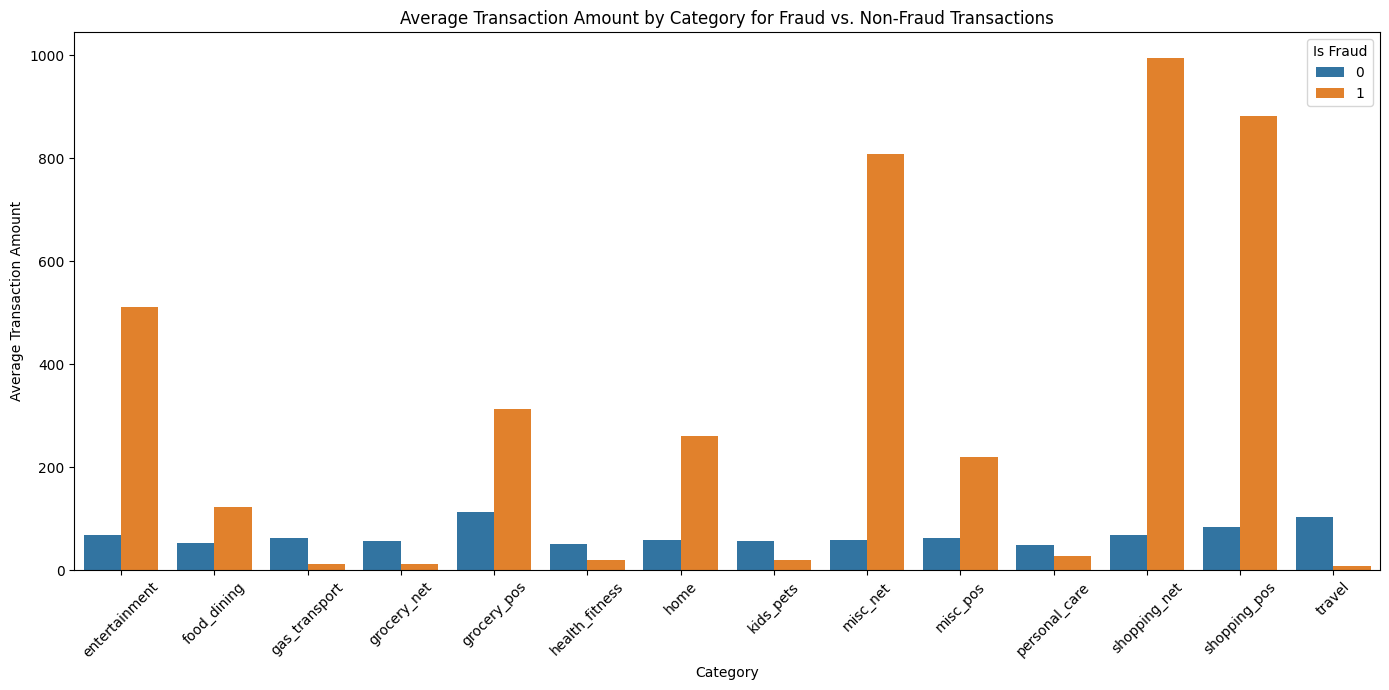

In [43]:
avg_amt_by_category = Xy_train.groupby(['category', target])['amt'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_amt_by_category, x='category', y='amt', hue=target)
plt.title('Average Transaction Amount by Category for Fraud vs. Non-Fraud Transactions')
plt.xlabel('Category')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Is Fraud', loc='upper right')
plt.tight_layout()
plt.show()

The bar plot shows the average transaction amount by category, differentiated by fraud and non-fraud transactions.

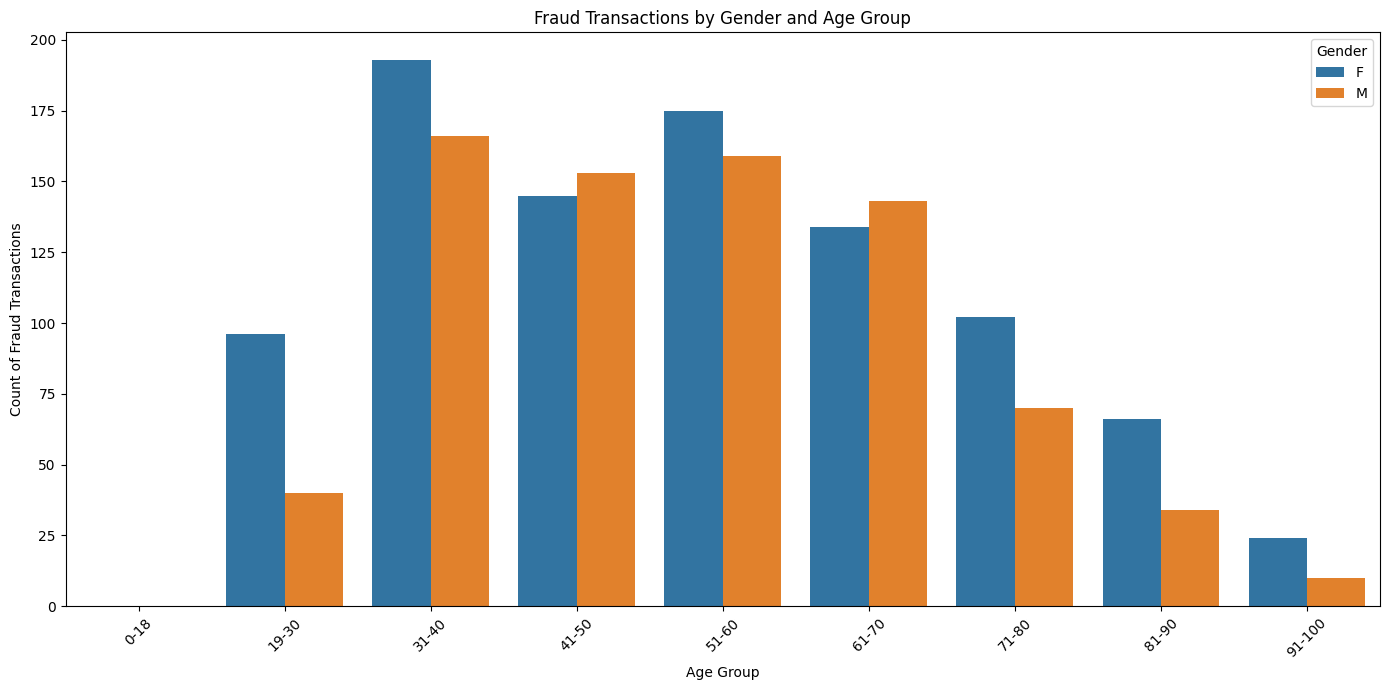

In [44]:
# Make a copy of the original data
Xy_train_copy = Xy_train.copy()

# Create age groups
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
Xy_train_copy['age'] = pd.Timestamp.now().year - pd.to_datetime(
                                                  Xy_train_copy['dob'],
                                                  dayfirst= True,
                                                  errors= 'coerce').dt.year
Xy_train_copy['age_group'] = pd.cut(Xy_train_copy['age'], bins=bins, labels=labels, right=False)

# Calculate the count of fraud transactions by gender and age group
fraud_by_gender_age = Xy_train_copy[Xy_train_copy[target] == 1].groupby(['gender', 'age_group']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=fraud_by_gender_age, x='age_group', y='count', hue='gender')
plt.title('Fraud Transactions by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Fraud Transactions')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

The bar plot displays the count of fraud transactions by gender and age group:
* Age Group 19-30: Males have slightly more fraud
transactions than females.
* Age Group 31-40: This group shows a higher number of fraud transactions for both genders, with males having a slightly higher count.
* Age Group 41-50: Similar to the 31-40 group, both genders have a high count, with males again leading.
* Age Group 51-60: Males show a higher count of fraud transactions compared to females.
* Other Age Groups: The counts are relatively low and fairly balanced between genders.

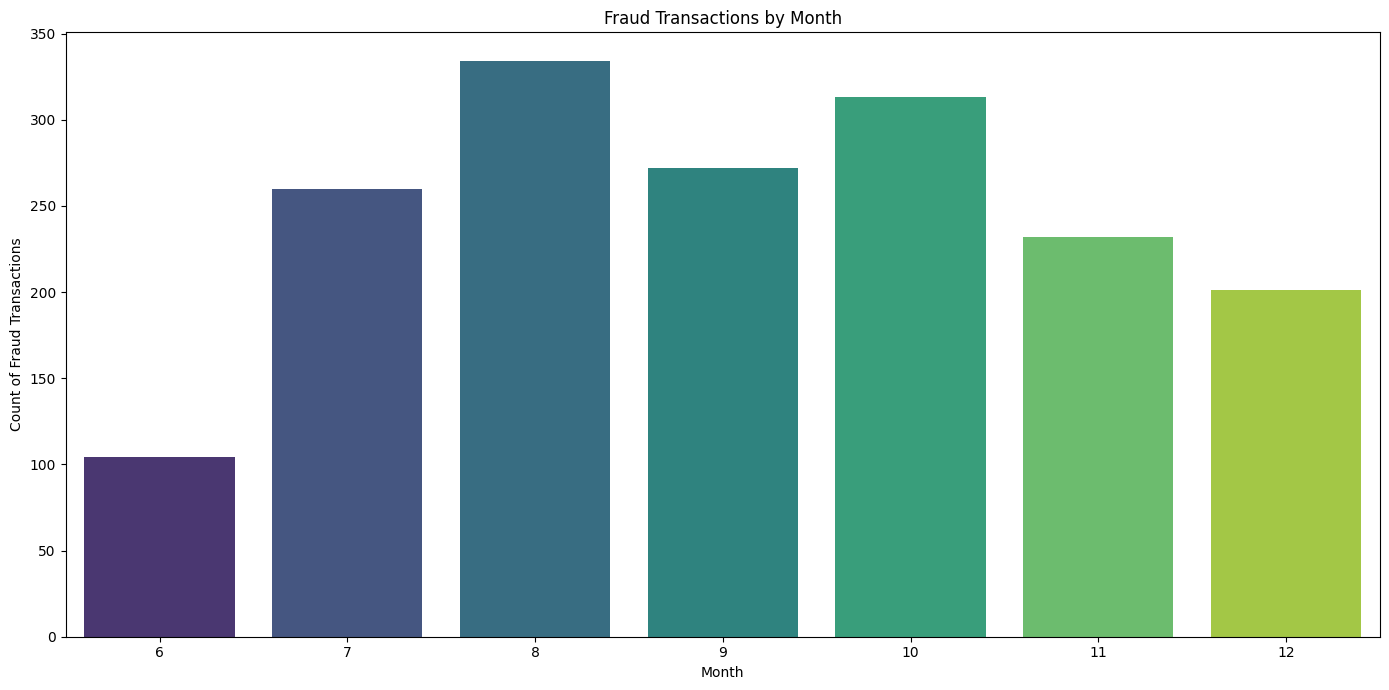

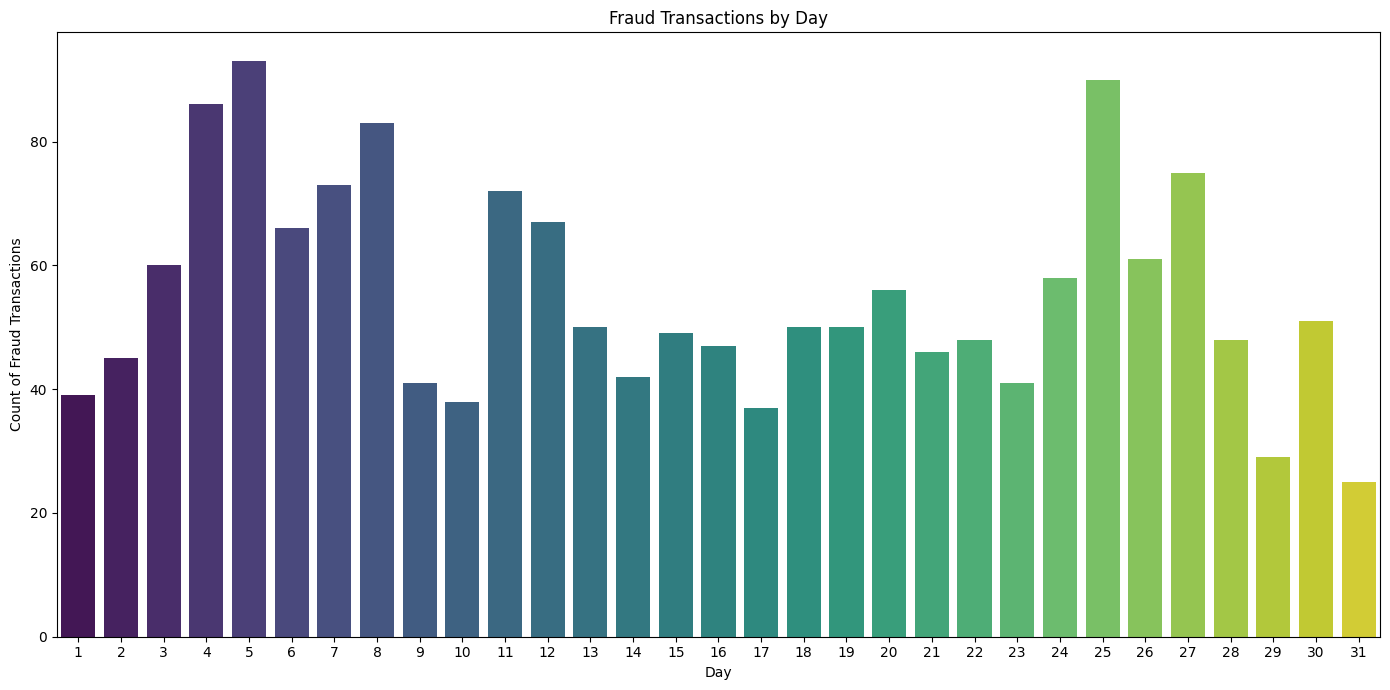

In [45]:
Xy_train_copy = Xy_train.copy()

# Transform trans_date_trans_time column
Xy_train_copy["trans_date_trans_time"] = pd.to_datetime(Xy_train_copy["trans_date_trans_time"], dayfirst=True)

# Seperate to columns : [year, month, day, time in day (morning, noon, evening, night)]
Xy_train_copy["trans_year"] = Xy_train_copy["trans_date_trans_time"].dt.year
Xy_train_copy["trans_month"] = Xy_train_copy["trans_date_trans_time"].dt.month
Xy_train_copy["trans_day"] = Xy_train_copy["trans_date_trans_time"].dt.day
Xy_train_copy["trans_time_in_day"] = ["morning" if i.timetuple()[3] >= 6 and i.timetuple()[3] < 12 else "noon" if i.timetuple()[3] >= 12 and i.timetuple()[3] < 18 else "evening" if i.timetuple()[3] >= 18 else "night" for i in Xy_train_copy["trans_date_trans_time"]]
Xy_train_copy.drop('trans_date_trans_time', axis=1, inplace=True)

# Filter data for fraud transactions
fraud_data = Xy_train_copy[Xy_train_copy['is_fraud'] == 1]

# Plot the count of fraud transactions by month
plt.figure(figsize=(14, 7))
sns.countplot(x=fraud_data["trans_month"], palette='viridis')
plt.title('Fraud Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count of Fraud Transactions')
plt.tight_layout()
plt.show()

# Plot the count of fraud transactions by day
plt.figure(figsize=(14, 7))
sns.countplot(x=fraud_data["trans_day"], palette='viridis')
plt.title('Fraud Transactions by Day')
plt.xlabel('Day')
plt.ylabel('Count of Fraud Transactions')
plt.tight_layout()
plt.show()

The month bar plot shows the total number of fraud transactions for each month of the year. It helps in understanding if there are certain months where fraud is more prevalent. For example, there could be peaks during holiday seasons or end-of-year months.

The day bar plot shows the total number of fraud transactions for each day of the month. It can reveal if there are specific days when fraud is more likely to occur. For instance, spikes at the beginning or end of the month might indicate patterns related to payment cycles.

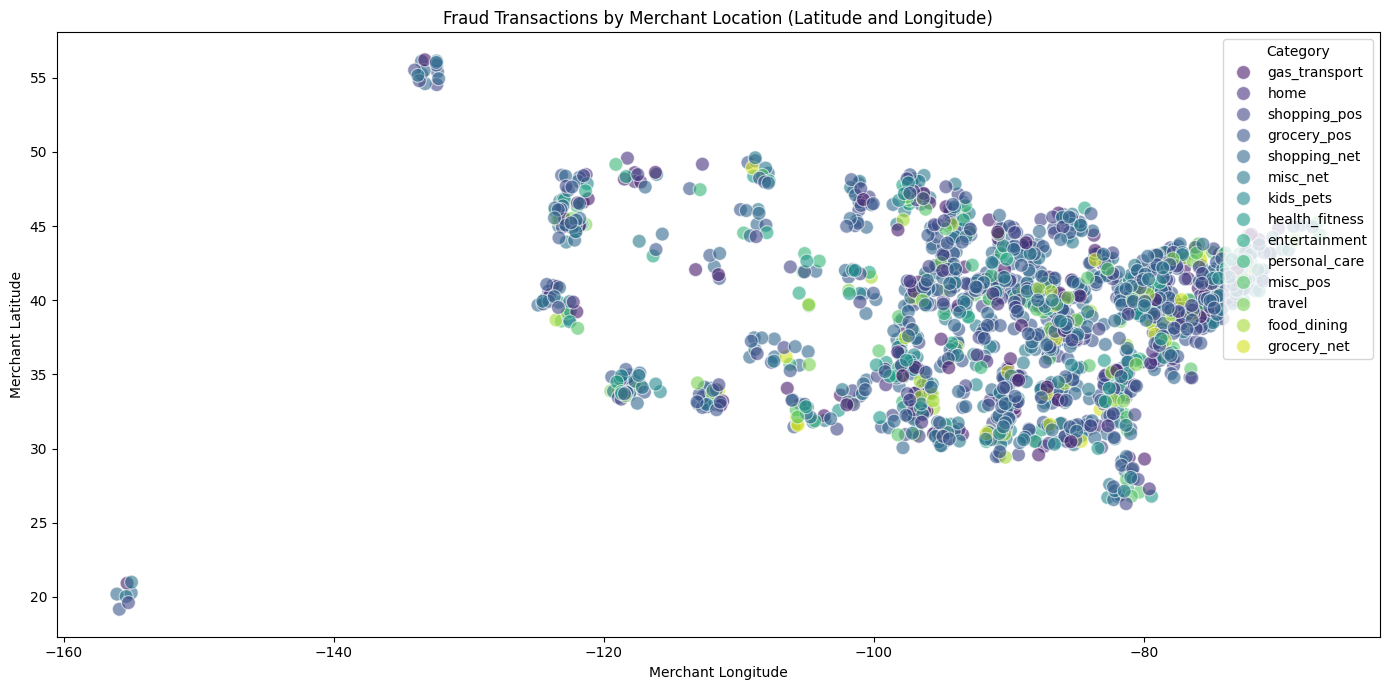

In [46]:
# Filter data for fraud transactions
fraud_data = X_train[y_train == 1]

# Plot the scatter plot of fraud transactions by merchant location
plt.figure(figsize=(14, 7))
sns.scatterplot(x='merch_long', y='merch_lat', data=fraud_data, hue='category', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Fraud Transactions by Merchant Location (Latitude and Longitude)')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.show()

1. Geographical Clustering:
 * Clusters: Look for clusters of points. A high density of points in certain areas indicates regions with a higher frequency of fraud transactions.
 * Isolated Points: Isolated points may indicate sporadic fraud incidents in less frequented areas.
2. Categorical Distribution:
 * Colors: The points are colored based on the transaction category. This helps in identifying which categories are more prevalent in certain geographical locations.
 * Patterns: Observe if certain categories are more concentrated in specific areas, suggesting geographical preferences or vulnerabilities for those types of fraud.

3. Latitude and Longitude Trends:
 * Latitude (Y-axis): Vertical distribution of points shows how fraud transactions are spread across different latitudes.
 * Longitude (X-axis): Horizontal distribution of points shows the spread across different longitudes.
4. Density and Spread:
 * High Density Areas: Areas with a high density of fraud points might be high-risk regions that require more attention or better fraud detection mechanisms.
 * Wide Spread: A wide spread of points indicates a widespread issue that isn't confined to specific regions.


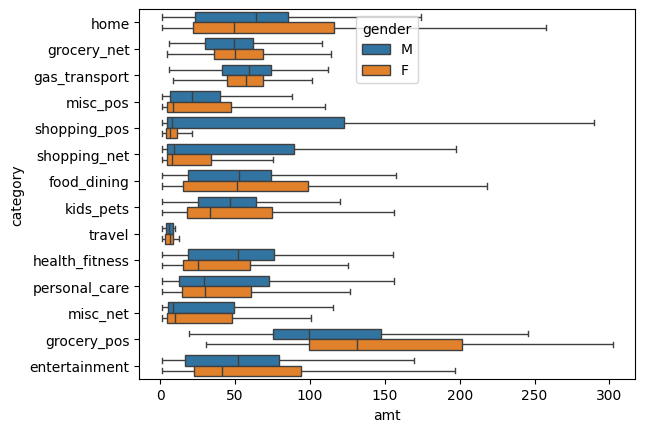

In [47]:
boxplot_data = X_train[["amt", "category", "gender"]]
Q1 = boxplot_data['amt'].quantile(0.25)
Q3 = boxplot_data['amt'].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

boxplot_data = boxplot_data[(boxplot_data['amt'] >= lower_bound) & (boxplot_data['amt'] <= upper_bound)]


sns.boxplot(y = "category", x = "amt", data = boxplot_data, hue = "gender", fliersize=0);

This is a boxplot that displays the distribution of transaction amounts across different categories and genders, while removing outliers based on the IQR method. The fliersize=0 parameter ensures that outliers are not plotted on the boxplot.

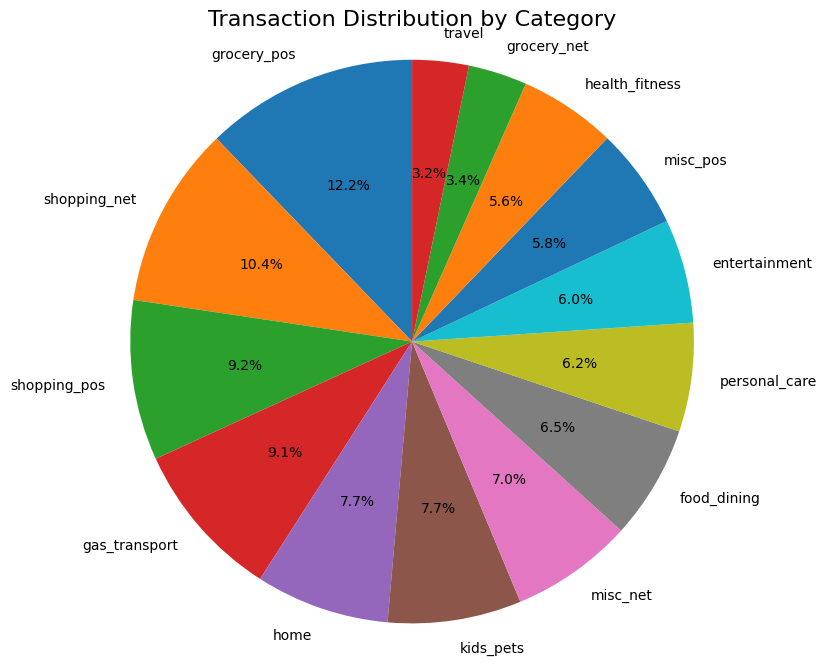

In [48]:
category_counts = X_train['category'].value_counts()

# Create labels for the pie chart
labels = category_counts.index.tolist()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Distribution by Category', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

In this pie chart:

* Each slice represents a category.
* The percentage on each slice shows the proportion of transactions in that category out of the total.
* The 'startangle' parameter rotates the pie chart so that the first slice starts from the top.
* The 'equal' aspect ratio ensures that the pie chart is drawn as a circle.

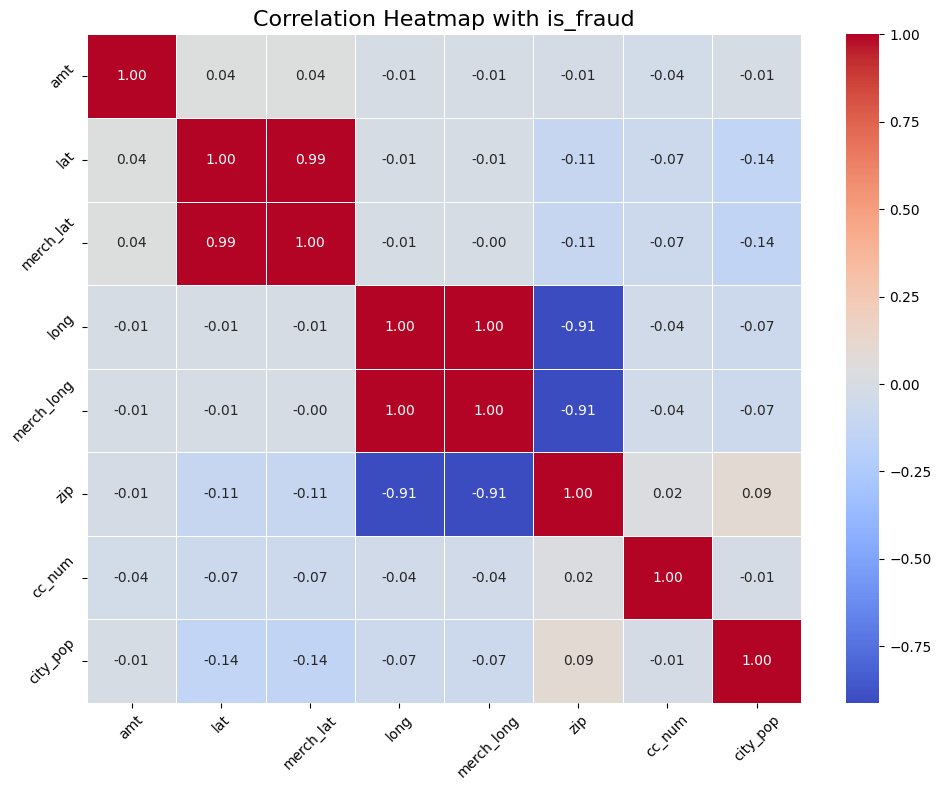

In [49]:
# Calculate the correlation matrix
correlation_matrix = Xy_train.corr(numeric_only= True)

# Filter correlation matrix for 'is_fraud' column
fraud_correlation = correlation_matrix[target].sort_values(ascending=False)

# Select top correlated features (excluding 'is_fraud' itself)
top_correlated_features = fraud_correlation.index[1:11]  # Select top 10 features

# Filter correlation matrix for top correlated features
top_correlation_matrix = correlation_matrix.loc[top_correlated_features, top_correlated_features]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap with is_fraud', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In this heatmap:

* Each cell represents the correlation coefficient between two features.
* We only consider features that are most correlated with the 'is_fraud' column.
* The annotations inside each cell display the correlation coefficient.
* The color intensity and color scale represent the strength and direction of the correlation (positive or negative).

This heatmap will help identify which features are most correlated with fraudulent transactions, providing valuable insights for fraud detection and analysis.

## Data Preprocessing

In [50]:
lrn.set_config(transform_output= "pandas")

### Column subsets

In [51]:
X_train.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
dtype: object

In [52]:
all_cols = set(X_train.columns)

old_name_cols = set(['first', 'last'])
new_name_cols = set(['name'])
old_address_cols = set(['street', 'city', 'state'])
new_address_cols = set(['address'])
old_age_cols = set(['dob'])
new_age_cols = set(['age'])

num_cols = set(X_train.select_dtypes(include= "number").columns) \
           | new_age_cols
date_cols = set(['trans_date_trans_time'])
nom_cols = all_cols \
            - (num_cols  | date_cols | old_name_cols \
                        | old_address_cols | old_age_cols) \
            | (new_name_cols | new_address_cols)
nom_lc_ord_cols = set(['gender'])
nom_lc_uord_cols = set(['category'])
nom_lc_cols = nom_lc_ord_cols | nom_lc_uord_cols
nom_hc_cols = nom_cols - nom_lc_cols

### Feature engineering (fe)

#### Dates to floats (number of seconds since Unix Epoch)

In [53]:
fe_date_cols = list(date_cols)

In [54]:
fe_date_action = helpers.make_date2float_converter()

#### Concatenate first and last names

In [55]:
fe_name_cols = list(old_name_cols)

In [56]:
def fe_name_func(X):
  return pd.DataFrame(data= X["first"] + " " + X["last"])

In [57]:
new_name_cols

{'name'}

In [58]:
fe_name_action = helpers.make_col_reducing_function_transformer(
                  feature_names_in_num= len(fe_name_cols),
                  mapping= fe_name_func,
                  feature_names_out= list(new_name_cols))

#### Concatenate addresses

In [59]:
fe_address_cols = list(old_address_cols)

In [60]:
# Let's see how many different locations exist in the data
X_train.groupby(fe_address_cols).size().sort_values(ascending= False)

city          street                        state
Clarks Mills  444 Robert Mews               PA       36
Smiths Grove  302 Christina Islands         KY       32
Plymouth      94431 Matthew Mall Suite 296  CT       32
Carlotta      010 Weaver Land               CA       31
Uledi         864 Reynolds Plains           PA       31
                                                     ..
Brainard      785 Kevin Walk Suite 237      NE        1
Los Angeles   386 James Roads Apt. 233      CA        1
Vinton        5758 Yates Center             CA        1
Colton        79209 Gary Dale               WA        1
Vienna        73869 Connie Prairie          GA        1
Length: 900, dtype: int64

In [61]:
X_train.groupby(["city", "state"]).size().sort_values(ascending=False)

city             state
Clarks Mills     PA       36
Phoenix          AZ       35
Plymouth         CT       32
Smiths Grove     KY       32
Carlotta         CA       31
                          ..
Gainesville      TX        1
Nokomis          IL        1
North Haverhill  NH        1
Vienna           GA        1
Vinton           CA        1
Length: 859, dtype: int64

We will use the street, city and state because they are not id unique for each recoerd.

In [62]:
def fe_address_func(df: pd.DataFrame) -> pd.DataFrame:
  return pd.DataFrame(data= df['street'] + ', ' + df['city'] + ', ' + df['state'], columns=list(new_address_cols))

In [63]:
fe_address_func(X_train[fe_address_cols])

,address
192425,"6274 David Oval Suite 725, Scarborough, ME"
103114,"0611 Stafford Valley Suite 504, Naples, FL"
341816,"478 Donovan Corners Apt. 803, Schaumburg, IL"
370498,"094 Owens Underpass, Norwalk, CA"
462378,"23843 Scott Island, Birmingham, IA"
...,...
85600,"1125 Ray Track, Livonia, MI"
246569,"713 Scott Pike Apt. 712, Bridger, MT"
234495,"74890 Rodriguez Springs Apt. 540, West Henriet..."
269441,"4440 George Mills Suite 591, Dallas, TX"


In [64]:
fe_address_action = helpers.make_col_reducing_function_transformer(
                        feature_names_in_num= len(fe_address_cols),
                        mapping= fe_address_func,
                        feature_names_out= list(new_address_cols))

#### Calculate age from dob (date of birth)

In [65]:
fe_age_cols = list(old_age_cols)

In [66]:
def fe_age_func(date_of_birth: pd.DataFrame) -> pd.DataFrame:
    date_of_birth_timestamp = date_of_birth.apply(
        lambda col: pd.to_datetime(col, dayfirst= True, errors= 'coerce'))
    yob = date_of_birth_timestamp.apply(lambda col: col.dt.year)
    mob = date_of_birth_timestamp.apply(lambda col: col.dt.month)
    dob = date_of_birth_timestamp.apply(lambda col: col.dt.day)

    now = pd.Timestamp.now()
    ynow = now.year
    mnow = now.month
    dnow = now.day

    # Inspired by https://stackoverflow.com/a/52251790/1818935
    return ynow - yob - ((mnow < mob) & (dnow < dob))

In [67]:
fe_age_action = helpers.make_col_reducing_function_transformer(
                  feature_names_in_num= len(fe_age_cols),
                  mapping= fe_age_func,
                  feature_names_out= list(new_age_cols))

#### Feature engineering transformer

In [68]:
fe_action = ColumnTransformer(transformers= [('date',
                                              fe_date_action,
                                              fe_date_cols),
                                             ('name',
                                              fe_name_action,
                                              fe_name_cols),
                                             ('address',
                                              fe_address_action,
                                              fe_address_cols),
                                             ('age',
                                              fe_age_action,
                                              fe_age_cols)],
                              remainder= 'passthrough',
                              n_jobs= -1,
                              verbose_feature_names_out= False,
                              force_int_remainder_cols= False)

### Imputation

In [69]:
impute_date_cols = list(date_cols)
impute_num_cols = list(num_cols)
impute_nom_lc_cols = list(nom_lc_cols)
impute_nom_hc_cols = list(nom_hc_cols)

In [70]:
impute_date_action = SimpleImputer(strategy= "median")
impute_num_action = SimpleImputer(strategy= "mean")
impute_nom_lc_action = SimpleImputer(strategy= "most_frequent")
impute_nom_hc_action = SimpleImputer(strategy= "constant", fill_value= "missing")

In [71]:
impute_action = ColumnTransformer(transformers= [('date',
                                                  impute_date_action,
                                                  impute_date_cols),
                                                 ('num',
                                                  impute_num_action,
                                                  impute_num_cols),
                                                 ('nom_lc',
                                                  impute_nom_lc_action,
                                                  impute_nom_lc_cols),
                                                 ('nom_hc',
                                                  impute_nom_hc_action,
                                                  impute_nom_hc_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

### Nominal to numeric

In [72]:
nom_to_num_lc_ord_cols =  list(nom_lc_ord_cols)
nom_to_num_lc_uord_cols = list(nom_lc_uord_cols)
nom_to_num_hc_cols =  list(nom_hc_cols)

In [73]:
nom_to_num_lc_ord_orders = [['F', 'M']]

In [74]:
nom_to_num_lc_ord_action = OrdinalEncoder(categories= nom_to_num_lc_ord_orders,
                                          handle_unknown= 'use_encoded_value',
                                          unknown_value= -1)
nom_to_num_lc_uord_action = OneHotEncoder(sparse_output= False,
                                          handle_unknown= 'ignore')
nom_to_num_hc_action = TargetEncoder(random_state= seed)

In [75]:
nom_to_num_action = ColumnTransformer(transformers= [ ('lc_ord',
                                                       nom_to_num_lc_ord_action,
                                                       nom_to_num_lc_ord_cols),
                                                      ('lc_urod',
                                                       nom_to_num_lc_uord_action,
                                                       nom_to_num_lc_uord_cols),
                                                      ('hc',
                                                       nom_to_num_hc_action,
                                                       nom_to_num_hc_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

### Outliers

In [76]:
outliers_cols = list(num_cols)

In [77]:
outliers_cap_action = Winsorizer()

In [78]:
outliers_action = ColumnTransformer(transformers= [ ('cap',
                                                       outliers_cap_action,
                                                       outliers_cols)],
                                  remainder= 'passthrough',
                                  n_jobs= -1,
                                  verbose_feature_names_out= False,
                                  force_int_remainder_cols= False)

### Scaler

In [79]:
scaler_action = MinMaxScaler()

### Preprocessing pipeline

In [80]:
preprocess_steps= [('fe', fe_action),
                   ('impute', impute_action),
                   ('nom_to_num', nom_to_num_action),
                   ('outliers', outliers_action),
                   ('scale', scaler_action)]

In [81]:
preprocessor = Pipeline(steps= preprocess_steps)
preprocessor

Pipeline(steps=[('fe',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('date',
                                                  FunctionTransformer(func=<function __periods_since_epoch_in_secs__ at 0x00000252557B6F20>,
                                                                      kw_args={'period': 'D'}),
                                                  ['trans_date_trans_time']),
                                                 ('name',
                                                  Pipeline(steps=[('mutate',
                                                                   FunctionTransformer(feature_names_out=<function make...
                                                  TargetEncoder(random_state=42),
                                                  ['name', 'address', 'job',
                                                   'merchant'])],
                                   verbose_feature_names_out=False)),
                ('outliers',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('cap', Winsorizer(),
                                                  ['zip', 'cc_num', 'merch_lat',
                                                   'merch_long', 'city_pop',
                                                   'long', 'age', 'lat',
                                                   'amt'])],
                                   verbose_feature_names_out=False)),
                ('scale', MinMaxScaler())])

In [82]:
preprocessor.fit_transform(X_train, y_train)

,zip,cc_num,merch_lat,merch_long,city_pop,long,age,lat,amt,gender,...,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,name,address,job,merchant,trans_date_trans_time
192425,0.028551,8.015224e-04,0.694996,0.974120,0.021634,0.975488,0.9000,0.697615,0.021926,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.135148,0.081243,0.347150
103114,0.332999,7.907523e-04,0.199347,0.857232,0.318648,0.858928,0.3250,0.180392,0.064332,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.186528
341816,0.597340,8.490352e-05,0.644253,0.794428,0.106537,0.793872,0.4500,0.651147,0.010594,1.0,...,0.0,0.0,0.0,0.0,0.0,0.514541,0.514541,0.161686,0.267102,0.683938
370498,0.906035,1.093093e-06,0.412924,0.492150,0.121841,0.486999,0.3875,0.411007,0.084727,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.169734,0.746114
462378,0.519724,8.121412e-04,0.615082,0.740504,0.000999,0.754374,0.2125,0.617036,0.203202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.444232,0.444232,0.444232,0.000000,0.896373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85600,0.475320,6.876806e-06,0.646099,0.829224,0.111904,0.842135,0.5000,0.662442,0.025564,1.0,...,0.0,1.0,0.0,0.0,0.0,0.879423,0.879423,0.879423,0.049730,0.150259
246569,0.585391,7.981643e-04,0.776962,0.573191,0.001643,0.580873,0.3375,0.748025,0.080152,1.0,...,0.0,0.0,1.0,0.0,0.0,0.418828,0.646161,0.299685,0.506376,0.466321
234495,0.135095,4.812572e-05,0.663147,0.883073,0.011815,0.900362,0.4625,0.681511,0.883273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.450101,0.450101,0.450101,0.454962,0.435233
269441,0.749544,1.792818e-11,0.363242,0.703682,1.000000,0.705361,0.7750,0.377374,0.238879,1.0,...,0.0,0.0,0.0,0.0,0.0,0.608883,0.608883,0.608883,0.000000,0.512953


## Machine Learning

### Classifier pipeline

In [83]:
placeholder_classifier = KNeighborsClassifier()

In [84]:
classify_steps= [ ('preprocess', preprocessor),
                  ('classify', placeholder_classifier)]

In [85]:
clf = Pipeline(steps= classify_steps)

### Data balancing

In [86]:
y_train.value_counts()

is_fraud
0    6284
1    1716
Name: count, dtype: int64

In [87]:
X_train_resampled, y_train_resampled = RandomOverSampler(random_state= seed).fit_resample(X_train, y_train)

In [88]:
y_train_resampled.value_counts()

is_fraud
0    6284
1    6284
Name: count, dtype: int64

### Grid search

In [89]:
grid = [{
          'preprocess__scale': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
          'classify': [KNeighborsClassifier()],
          'classify__n_neighbors': [1,2,3,4,5]
         },
         {
           'preprocess__scale': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
           'classify': [SVC(random_state=seed)],
           'classify__C': [1, 10, 100],
           'classify__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
          }]

In [90]:
scorer = make_scorer(f1_score)

In [91]:
gs = GridSearchCV(estimator= clf,
                  param_grid= grid,
                  verbose= 10,
                  n_jobs= -1,
                  scoring = scorer,
                  error_score= 'raise')

In [92]:
gs = helpers.fit(gs, X_train, y_train)

original fit duration: 00:03:22


In [93]:
gs.best_params_

{'classify': SVC(random_state=42),
 'classify__C': 100,
 'classify__kernel': 'poly',
 'preprocess__scale': MaxAbsScaler()}

## Performence research

In [94]:
y_pred = helpers.predict(gs, X_test)

original predict duration: 00:00:00


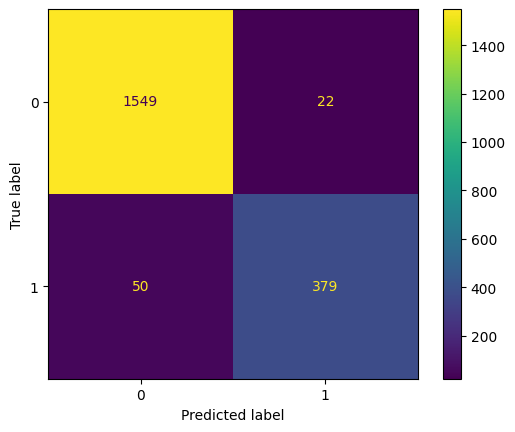

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1571
           1       0.95      0.88      0.91       429

    accuracy                           0.96      2000
   macro avg       0.96      0.93      0.95      2000
weighted avg       0.96      0.96      0.96      2000



## Summary

The dataset includes various features related to financial transactions such as transaction type, different categories, transaction date and time, and more.
Using a diverse set of features allows for a comprehensive analysis of transactions and identification of various fraud patterns.

The model's performance is measured using classification report and confusion matrix.
A grid search (GridSearchCV) was used to find the best parameters for the model, which contributes to improved performance.

Personal Reflection

Building machine learning models requires a deep understanding of the data, including steps for data cleaning and feature engineering.
Finding optimal parameters and using validation techniques to enhance the model's efficiency.
Understanding different performance metrics and how to interpret them.

Challenges in the Learning Process and Project Writing:

- Balancing the number of features with the model's performance: more features can enrich the model but also lead to overcomplexity.
- Managing large datasets and ensuring quick processing capabilities.
 - Handling missing or inaccurate data.

Interesting Learning Topics:

- Feature Engineering: How to transform raw data into useful information for the model.
- Data Balancing: Techniques like SMOTE to handle imbalances between categories.
- Validation Methods and Performance Evaluation: K-fold cross-validation and using advanced performance metrics.

Topics I Explored Independently:

- Grid Search and finding optimal parameters.
- Visualization tools to illustrate model performance.
- Advanced techniques for handling missing data and improving the quality of existing data.

Summary:

This project provided in-depth knowledge in the field of machine learning, particularly in financial fraud detection. It presented various challenges but also equipped you with tools and insights to address them, which will help in tackling similar problems more effectively in the future.







